In [19]:
# IMPORTS
# Pandas is used for data manipulation
import pandas as pd
# Use numpy to convert to arrays
import numpy as np
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Utility to store and load model from disk
from sklearn.externals import joblib
# write csv files
import csv
# Import charting lib
import matplotlib.pyplot as plt

In [20]:
# UTIL
def test_model(forest_model, test_features, test_labels):
    # Use the forest's predict method on the test data
    predictions = np.round(forest_model.predict(test_features))

    # Calculate the absolute errors
    errors = abs(predictions - test_labels)

    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2))

    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / test_labels)

    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    # Pull out one tree from the forest
    tree = forest_model.estimators_[5]

    print('The depth of this tree is:', tree.tree_.max_depth)

    total_trues = sum(x == 2 for x in test_labels)
    total_predictions = sum(x == 2 for x in predictions)
    total_errors = sum(x == 1 for x in errors)
    print('Total Samples:', len(test_labels))
    print('Total Trues:', total_trues)
    print('Total Predictions:', total_predictions)
    print('Total Errors:', total_errors)

    false_positive = sum(predict > label for predict, label in zip(predictions, test_labels))
    false_negative = sum(predict < label for predict, label in zip(predictions, test_labels))
    true_positive = total_predictions - false_positive
    print('false_positive:', false_positive)
    print('false_negative:', false_negative)
    print('true_positive:', true_positive)
    
    
    precision = true_positive / total_predictions
    recall = true_positive / (true_positive + false_negative)
    print('precision:', precision)
    print('recall:', recall)

    importances = forest_model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest_model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(test_features.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(test_features.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(test_features.shape[1]), indices)
    plt.xlim([-1, test_features.shape[1]])
    plt.show()    
    
    
    return precision, recall

In [25]:
# Prepare the source data
features = pd.read_csv('votes_cubes_match_synt_75.csv')

# Remove the irrelevant texts from the features
# axis 1 refers to the columns
features = features.drop('fragmanetAndSide', axis = 1)
features = features.drop('fragment', axis = 1)
features = features.drop('fragmentAndSideTotal', axis = 1)
features = features.drop('fragmentAndSideTrend', axis = 1)
features = features.drop('fragmentAndSideCubes', axis = 1)
features = features.drop('fragmentAndSideDrawRect', axis = 1)
features = features.drop('fragmentAndSideMatchPoint', axis = 1)
features = features.drop('origCoordinates', axis = 1)
features = features.drop("firstFileName", axis = 1)
features = features.drop("firstCroppedWidth", axis = 1)
features = features.drop("firstOffsetX", axis = 1)
features = features.drop("firstOffsetY", axis = 1)
features = features.drop("firstHorizontalFlip", axis = 1)
features = features.drop("secondFileName", axis = 1)
features = features.drop("secondCroppedWidth", axis = 1)
features = features.drop("secondOffsetX", axis = 1)
features = features.drop("secondOffsetY", axis = 1)
features = features.drop("secondHorizontalFlip", axis = 1)

# One-hot encode categorical features
#features = pd.get_dummies(features)

# Labels are the values we want to predict
labels = np.array(features['class'])
labels = labels + 1

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('class', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

feature_list

['fragmentTotal',
 'fragmentVote',
 'devideVoteByTotal',
 'fragmentAndSideVote',
 'devideSideVoteBySideTotal',
 'fragmentAndSideTrendVote',
 'devideSideTrendVoteBySideTotal',
 'fragmentAndSideTrendVoteStrict',
 'devideSideTrendVoteStrictBySideTotal',
 'fragmentAndSideTrendVoteSync',
 'devideSideTrendVoteSyncBySideTotal']

Mean Absolute Error: 0.0
Accuracy: 99.92 %.
The depth of this tree is: 10
Total Samples: 2552
Total Trues: 66
Total Predictions: 68
Total Errors: 2
false_positive: 2
false_negative: 0
true_positive: 66
precision: 0.970588235294
recall: 1.0
Feature ranking:
1. feature 3 (0.861275)
2. feature 6 (0.060602)
3. feature 5 (0.047973)
4. feature 2 (0.010162)
5. feature 1 (0.006691)
6. feature 0 (0.005697)
7. feature 4 (0.002349)
8. feature 8 (0.001651)
9. feature 7 (0.001548)
10. feature 10 (0.001032)
11. feature 9 (0.001021)


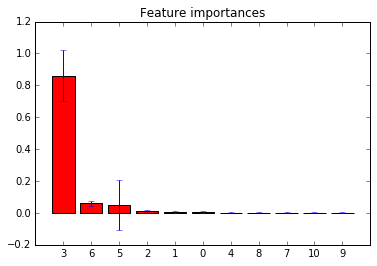

(0.97058823529411764, 1.0)

In [11]:
# Random Forest 1st model
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

rf.fit(train_features, train_labels)

test_model(rf, test_features, test_labels)

In [16]:
# from sklearn.model_selection import cross_val_predict
# from sklearn import metrics
# predicted = cross_val_predict(rf, test_features, test_labels, cv=5)
# metrics.accuracy_score(test_labels, np.round(predicted)) 


0.9992163009404389

Mean Absolute Error: 0.0
Accuracy: 99.83 %.
The depth of this tree is: 14
Total Samples: 3828
Total Trues: 94
Total Predictions: 99
Total Errors: 7
false_positive: 6
false_negative: 1
true_positive: 93
precision: 0.939393939394
recall: 0.989361702128
Feature ranking:
1. feature 3 (0.853131)
2. feature 5 (0.063906)
3. feature 6 (0.056606)
4. feature 2 (0.013293)
5. feature 0 (0.005399)
6. feature 1 (0.003861)
7. feature 4 (0.001680)
8. feature 7 (0.001008)
9. feature 9 (0.000721)
10. feature 10 (0.000233)
11. feature 8 (0.000160)


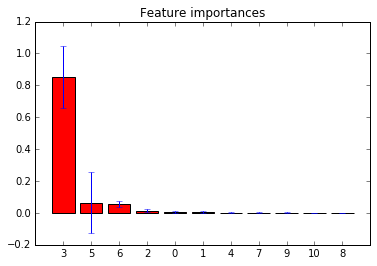

(0.93939393939393945, 0.98936170212765961)

In [8]:
# Random Forest 2nd variation of model - just for reference - not used
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)
rf_new.fit(train_features, train_labels)

test_model(rf_new, test_features, test_labels)

Mean Absolute Error: 0.0
Accuracy: 99.9 %.
The depth of this tree is: 3
Total Samples: 3828
Total Trues: 94
Total Predictions: 98
Total Errors: 4
false_positive: 4
false_negative: 0
true_positive: 94
precision: 0.959183673469
recall: 1.0
Feature ranking:
1. feature 3 (0.738952)
2. feature 5 (0.188363)
3. feature 6 (0.060982)
4. feature 1 (0.005162)
5. feature 4 (0.003158)
6. feature 2 (0.001737)
7. feature 0 (0.001645)
8. feature 10 (0.000000)
9. feature 9 (0.000000)
10. feature 8 (0.000000)
11. feature 7 (0.000000)


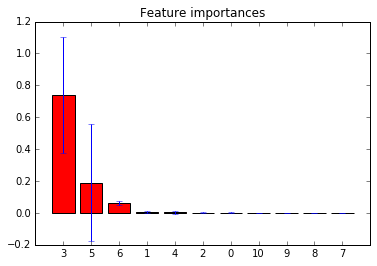

(0.95918367346938771, 1.0)

In [9]:
# Random Forest 3rd model - Limit depth of tree to 2 levels - not used
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

test_model(rf_small, test_features, test_labels)

In [17]:
# Finally - use the 1st model and this time train on the entire set 
rf.fit(features, labels);

joblib.dump(rf, 'rndFstBasic.pkl') 

['rndFstBasic.pkl']

In [18]:
# Run on the output of the voting and classify them
# Read in data as pandas dataframe
orig_features = pd.read_csv('pairs_votes.csv') #('real_cubes_all_vote.csv')

# Remove the irrelevant texts from the features
# axis 1 refers to the columns
features = orig_features.drop('fragmanetAndSide', axis = 1)
features = features.drop('fragment', axis = 1)
features = features.drop('fragmentAndSideTotal', axis = 1)
features = features.drop('fragmentAndSideTrend', axis = 1)
features = features.drop('fragmentAndSideCubes', axis = 1)
features = features.drop('fragmentAndSideDrawRect', axis = 1)
features = features.drop('fragmentAndSideMatchPoint', axis = 1)
features = features.drop('origCoordinates', axis = 1)
features = features.drop("firstFileName", axis = 1)
features = features.drop("firstCroppedWidth", axis = 1)
features = features.drop("firstOffsetX", axis = 1)
features = features.drop("firstOffsetY", axis = 1)
features = features.drop("firstHorizontalFlip", axis = 1)
features = features.drop("secondFileName", axis = 1)
features = features.drop("secondCroppedWidth", axis = 1)
features = features.drop("secondOffsetX", axis = 1)
features = features.drop("secondOffsetY", axis = 1)
features = features.drop("secondHorizontalFlip", axis = 1)
features = features.drop("class", axis = 1)

forest_model = joblib.load('rndFstBasic.pkl') 

predictions = np.round(forest_model.predict(features))-1
orig_features["class"] = predictions
filtered = orig_features[orig_features["class"] == 1]
filtered.to_csv('pairs_final.csv', index=False)